Index(['search', 'found', 'price', 'pre_discount'], dtype='object')
Index(['search', 'found', 'price', 'pre_discount'], dtype='object')
Index(['search', 'found', 'price', 'pre_discount'], dtype='object')
Index(['search', 'found', 'price', 'pre_discount'], dtype='object')
Index(['search', 'found', 'price', 'pre_discount'], dtype='object')
Index(['search', 'found', 'price', 'pre_discount'], dtype='object')
Index(['search', 'found', 'price', 'pre_discount'], dtype='object')


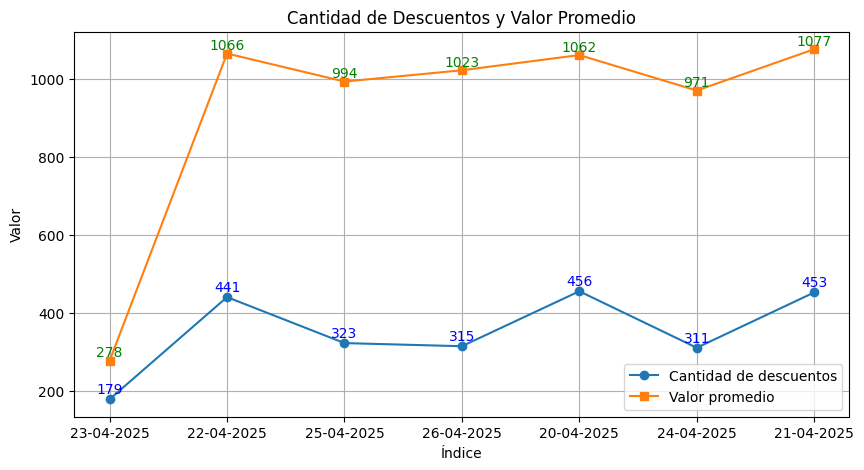

[179, 441, 323, 315, 456, 311, 453]
[278, 1066, 994, 1023, 1062, 971, 1077]


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import glob
import os

carpeta = '../../scrappers/acuenta/results'

csv_files = glob.glob(os.path.join(carpeta, '*.csv'))

dataframes = []

for archivo in csv_files:
    df = pd.read_csv(archivo)
    dataframes.append(df)

cantidad = []
promedio = []

for df in (dataframes):
    print(df.columns)
    df['descuento'] = df['price'] - df['pre_discount']
    bodegazo1000 =(df['price'] == 1000).sum()
    bodegazo2000 =(df['price'] == 2000).sum()
    bodegazo3000 =(df['price'] == 3000).sum()
    bodegazo = bodegazo1000+bodegazo2000+bodegazo3000
    descuentos = len(df[df['descuento'] < 0])
    cantidad.append(int(descuentos+bodegazo))
    total = -df['descuento'].sum()
    promedio.append(int(total/descuentos))


plt.figure(figsize=(10, 5))
plt.plot(cantidad, label='Cantidad de descuentos', marker='o')

plt.plot(promedio, label='Valor promedio', marker='s')

for i, valor in enumerate(cantidad):
    plt.text(i, valor + 15, str(valor), ha='center', color='blue')
for i, valor in enumerate(promedio):
    plt.text(i, valor + 10, str(valor), ha='center', color='green')
plt.title('Cantidad de Descuentos y Valor Promedio')
plt.xlabel('Índice')
plt.ylabel('Valor')

archivos_sin_extension = [os.path.splitext(os.path.basename(f))[0] for f in csv_files]
plt.xticks(range(len(csv_files)), archivos_sin_extension)
plt.legend()
plt.grid(True)

plt.show()
              
print(cantidad)
print(promedio)




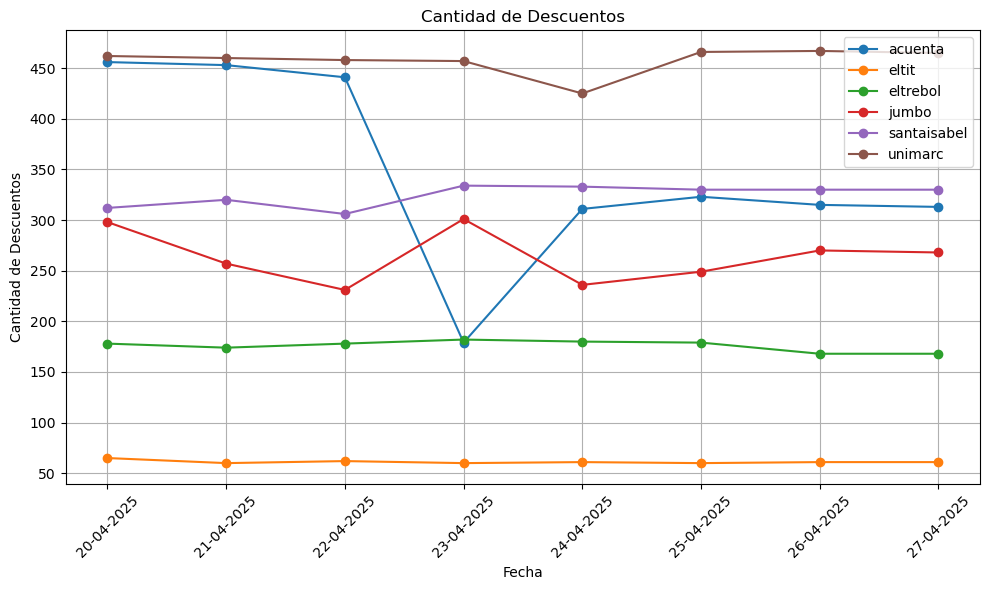

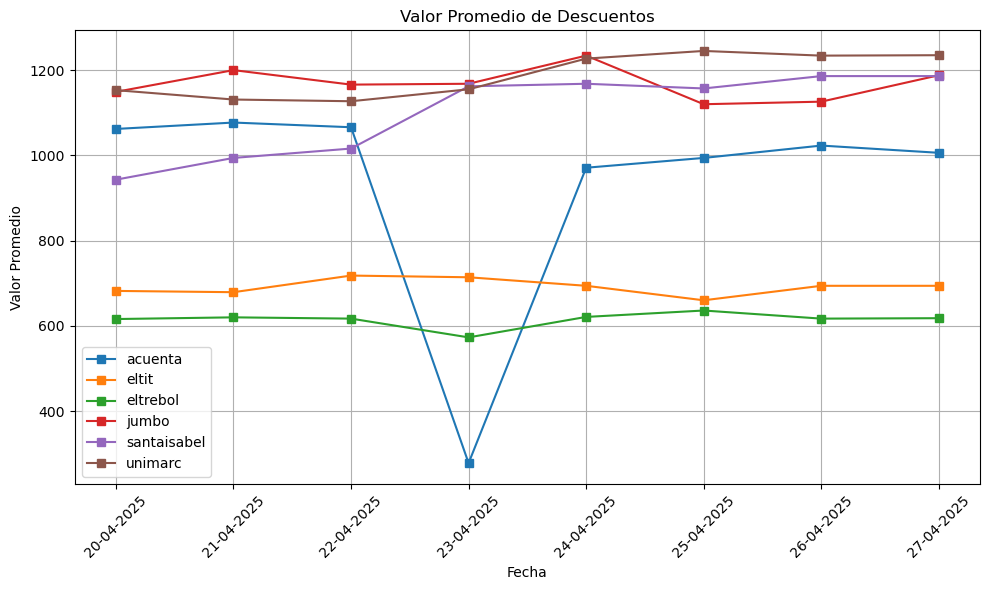


Resultados para la Carpeta 1:
Cantidad de descuentos: [456, 453, 441, 179, 311, 323, 315, 313]
Promedio de descuentos: [1062, 1077, 1066, 278, 971, 994, 1023, 1006]

Resultados para la Carpeta 2:
Cantidad de descuentos: [65, 60, 62, 60, 61, 60, 61, 61]
Promedio de descuentos: [682, 679, 718, 714, 694, 660, 694, 694]

Resultados para la Carpeta 3:
Cantidad de descuentos: [178, 174, 178, 182, 180, 179, 168, 168]
Promedio de descuentos: [616, 620, 617, 573, 621, 636, 617, 618]

Resultados para la Carpeta 4:
Cantidad de descuentos: [298, 257, 231, 301, 236, 249, 270, 268]
Promedio de descuentos: [1149, 1200, 1166, 1168, 1234, 1120, 1126, 1188]

Resultados para la Carpeta 5:
Cantidad de descuentos: [312, 320, 306, 334, 333, 330, 330, 330]
Promedio de descuentos: [943, 994, 1016, 1162, 1168, 1157, 1186, 1186]

Resultados para la Carpeta 6:
Cantidad de descuentos: [462, 460, 458, 457, 425, 466, 467, 465]
Promedio de descuentos: [1153, 1131, 1127, 1155, 1227, 1245, 1234, 1235]


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

# Lista de las rutas de las carpetas que contienen los archivos CSV
carpetas = [
    '../../scrappers/acuenta/results',
    '../../scrappers/eltit/results',
    '../../scrappers/eltrebol/results',
    '../../scrappers/jumbo/results',
    '../../scrappers/santaisabel/results',
    '../../scrappers/unimarc/results'
]

# Inicializar listas para almacenar los resultados
cantidad = []
promedio = []
nombres_archivos = []
nombres_carpetas = []

# Iterar sobre las carpetas
for carpeta in carpetas:
    # Extraer el nombre de la carpeta (ej. "acuenta", "eltit")
    nombre_carpeta = os.path.basename(os.path.dirname(carpeta))
    nombres_carpetas.append(nombre_carpeta)
    
    # Buscar todos los archivos .csv en la carpeta actual
    csv_files = glob.glob(os.path.join(carpeta, '*.csv'))
    cantidad_temporal = []
    promedio_temporal = []
    
    # Lista para almacenar los nombres de los archivos de la carpeta
    archivos_nombre_temporal = [os.path.splitext(os.path.basename(f))[0] for f in csv_files]
    
    # Procesar cada archivo CSV en la carpeta
    for archivo in csv_files:
        df = pd.read_csv(archivo)
        df['price'] = pd.to_numeric(df['price'], errors='coerce')
        df['pre_discount'] = pd.to_numeric(df['pre_discount'], errors='coerce')
        
        # Verificar si hay valores nulos y eliminarlos si es necesario
        df = df.dropna(subset=['price', 'pre_discount'])
        df['descuento'] = df['price'] - df['pre_discount']
         
        if nombre_carpeta == "acuenta":
            # Solo para la carpeta "acuenta", se considera bodegazo
            bodegazo1000 = (df['price'] == 1000).sum()
            bodegazo2000 = (df['price'] == 2000).sum()
            bodegazo3000 = (df['price'] == 3000).sum()
            bodegazo = bodegazo1000 + bodegazo2000 + bodegazo3000
            descuentos = len(df[df['descuento'] < 0])
            total = -df['descuento'].sum()
            cantidad_temporal.append(int(descuentos + bodegazo)) 
            promedio_temporal.append(int(total / descuentos))
        else:
            descuentos = len(df[df['descuento'] < 0])
            cantidad_temporal.append(int(descuentos))
            total = -df['descuento'].sum()
            promedio_temporal.append(int(total / descuentos))
    
    cantidad.append(cantidad_temporal)
    promedio.append(promedio_temporal)
    nombres_archivos.append(archivos_nombre_temporal)

# Graficar la cantidad de descuentos (gráfico 1)
plt.figure(figsize=(10, 6))
for i, cantidad_data in enumerate(cantidad):
    plt.plot(cantidad_data, label=f'{nombres_carpetas[i]}', marker='o')

plt.title('Cantidad de Descuentos')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Descuentos')

# Establecer los ticks para todos los archivos CSV en todas las carpetas
# Asegúrate de que el número de etiquetas coincida con el número de archivos de la primera carpeta
plt.xticks(range(len(nombres_archivos[0])), nombres_archivos[0], rotation=45)

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("cantidad_descuentos.png", format='png')
plt.show()  # Mostrar gráfico de cantidad de descuentos

# Graficar el valor promedio de descuentos (gráfico 2)
plt.figure(figsize=(10, 6))
for i, promedio_data in enumerate(promedio):
    plt.plot(promedio_data, label=f'{nombres_carpetas[i]}', marker='s')

plt.title('Valor Promedio de Descuentos')
plt.xlabel('Fecha')
plt.ylabel('Valor Promedio')

# Establecer los ticks para todos los archivos CSV en todas las carpetas
plt.xticks(range(len(nombres_archivos[0])), nombres_archivos[0], rotation=45)

plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig("valor_promedio_descuentos.png", format='png')
plt.show()  # Mostrar gráfico de valor promedio de descuentos

# Imprimir los resultados para cada carpeta
for i in range(len(carpetas)):
    print(f"\nResultados para la Carpeta {i+1}:")
    print("Cantidad de descuentos:", cantidad[i])
    print("Promedio de descuentos:", promedio[i])
